In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
def f(x):
    y = [math.exp(0.15 * u + 1) if u < 5 else math.exp(0.25 * u + 1) for u in x]
    return np.array(y)

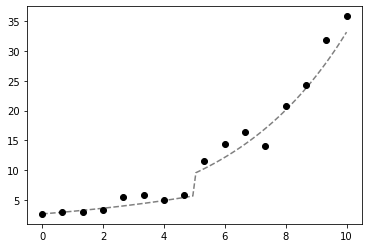

In [4]:
np.random.seed(12345)
x_real = np.linspace(start=0, stop=10, num=100)
x_data = np.linspace(start=0, stop=10, num=16)
d_data = f(x_data) + 0.3 * np.random.normal(0, 1, len(x_data)) * x_data

d_real = f(x_real)
plt.plot(x_real, d_real, '--', color='gray')
plt.plot(x_data, d_data, 'o', color='black');

In [5]:
print('x\td')
print('--------------------')
for a, b in zip(x_data, d_data):
    print(round(a, 4), round(b,4), sep='\t')

x	d
--------------------
0.0	2.7183
0.6667	3.1
1.3333	3.1123
2.0	3.3359
2.6667	5.6278
3.3333	5.8751
4.0	5.0645
4.6667	5.8684
5.3333	11.5427
6.0	14.4261
6.6667	16.4063
7.3333	14.1504
8.0	20.7455
8.6667	24.3234
9.3333	31.8198
10.0	35.7747


In [6]:
def SSE (w0, w1):
  y= [(np.exp( w0 + w1 * xi)) for xi in x_data]
  return sum([(di - yi) ** 2 for yi, di in zip(y, d_data)])

In [7]:
def plot_forecast(w0, w1):

    # Generación de una secuencia de puntos igualmente espaciados
    z = np.linspace(0.0, 10.0)

    # Cómputo de la salida del modelo
    y = (np.exp( w0 + w1 * z))

    # Datos originales
    plt.plot(x_data, d_data, "o")

    # Pronóstico con el modelo
    plt.plot(z, y, "-")

    plt.title("SSE=" + str(round(SSE(w0, w1), 4)))

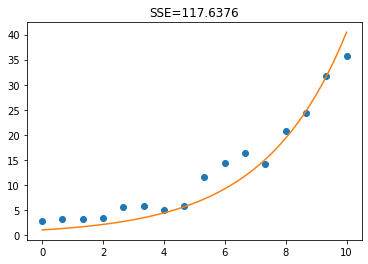

In [8]:
plot_forecast(w0=0.0005, w1=0.37)

In [9]:
#
# Generación de una malla de puntos
# y valor del SSE en cada punto
#
W0 = np.linspace(0, 0.005, 100)
W1 = np.linspace(0, 0.5,100)
W0, W1 = np.meshgrid(W0, W1)
F = SSE(W0, W1)

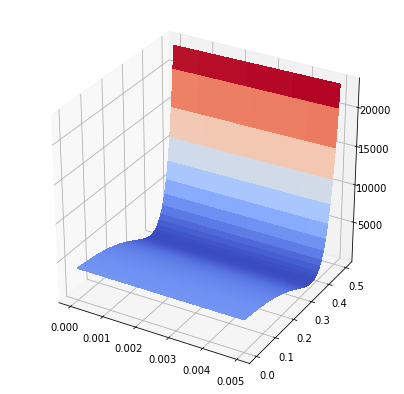

In [10]:
#
# Superficie de error
#
from matplotlib import cm
fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection="3d")
surf = ax.plot_surface(
    W0,
    W1,
    F,
    cmap=cm.coolwarm,
    linewidth=1,
    antialiased=False,
)

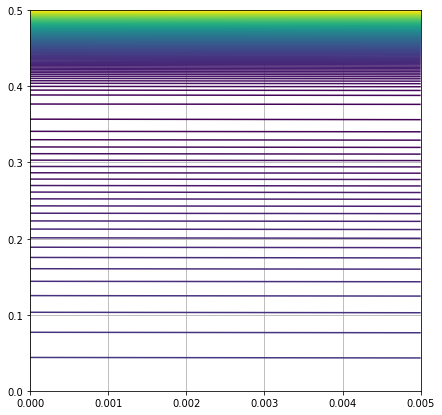

In [11]:
def plot_contour():
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_aspect( 'auto')
    ax.contour(W0, W1, F, levels=200)
    ax.grid()


plot_contour()

In [12]:
def gSSE(w0, w1):
    #
    # Calculo del vector de errores
    #
    y= [(np.exp( w0 + w1 * xi)) for xi in x_data]
    e = [(di - yi) for yi, di in zip(y, d_data)]

    #
    # Cómputo de los gradientes
    #
    gw0 = -2 * sum([ei* yi for ei,yi in zip(e, y) ])
    gw1 = -2 * sum([ei* (yi*xi) for ei,yi,xi in zip(e,y, x_data) ])

    #
    # Retorna el gradiente como una tupla
    #
    return gw0, gw1

In [13]:
def mejora(w0, w1, mu):
    #
    # Computo del gradiente para los parámetros actuales
    #
    gw0, gw1 = gSSE(w0, w1)

    #
    # Corrección de los parámetros
    #
    w0 = w0 - mu * gw0
    w1 = w1 - mu * gw1

    #
    #  Parámetros corregidos
    #
    return w0, w1

w0 = 0.26422551003487116; w1 = 0.33877126244259226; SSE = 76.42216393795987


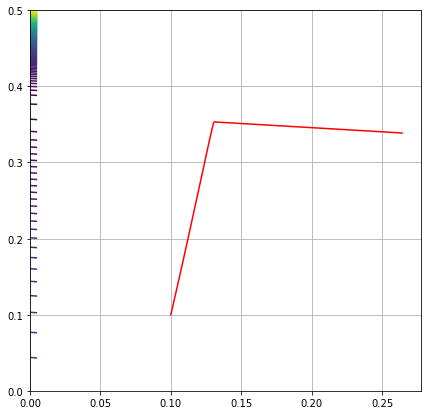

In [21]:
#
# Punto de inicio
#
w0 =0.1
w1 =0.1

history_w0 = [w0]
history_w1 = [w1]
history_f = [SSE(w0, w1)]

for epoch in range(1000):
    w0, w1 = mejora(w0, w1, 0.000001
    )
    history_w0.append(w0)
    history_w1.append(w1)
    history_f.append(SSE(w0, w1))

print("w0 = {}; w1 = {}; SSE = {}".format(w0, w1, SSE(w0, w1)))

plot_contour()
plt.plot(history_w0, history_w1, color="red");

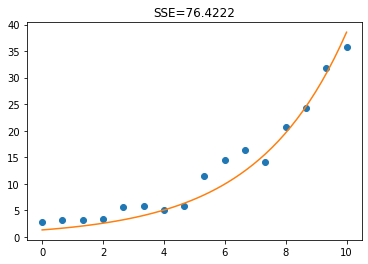

In [22]:
plot_forecast(w0=w0, w1=w1)